# 利用已经归一化好的数据对20180105这天数据进行聚类

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## 读取数据

In [4]:
data = pd.read_csv('./20180105_scale.csv')

## MiniBatchKMeans聚类

In [4]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.externals import joblib

## 尝试聚为5-20类并保存模型,文件名以20180105_{聚类个数}.csv命名

In [5]:
for cluster_num in range(5, 21):
    model = MiniBatchKMeans(n_clusters=cluster_num) 
    kmeans_data = data.copy()
    y_pred = model.fit_predict(kmeans_data)
    kmeans_data['label'] = y_pred
    kmeans_data.to_csv(index=False, path_or_buf='./data/20180105_{0}.csv'.format(cluster_num))
    joblib.dump(model,'./pkl/20180105_{0}.pkl'.format(cluster_num))

## 聚为9类， 发现由于未对CALLING_NUM做处理，所以聚类结果受其影响比较大

In [6]:
model = MiniBatchKMeans(n_clusters=9) 
kmeans_data = data.copy()
y_pred = model.fit_predict(kmeans_data)

In [7]:
kmeans_data['label'] = y_pred

In [8]:
kmeans_data[kmeans_data['label'] == 0]['CALLING_NUM']

260176    1.850192e+10
260177    1.850192e+10
260178    1.850196e+10
260179    1.850196e+10
260180    1.850197e+10
260181    1.850199e+10
260182    1.850213e+10
260183    1.850213e+10
260184    1.850216e+10
260185    1.850217e+10
260186    1.850217e+10
260187    1.850217e+10
260188    1.850217e+10
260189    1.850217e+10
260190    1.850220e+10
260191    1.850220e+10
260192    1.850221e+10
260193    1.850221e+10
260194    1.850221e+10
260195    1.850221e+10
260196    1.850221e+10
260197    1.850221e+10
260198    1.850221e+10
260199    1.850221e+10
260200    1.850221e+10
260201    1.850221e+10
260202    1.850222e+10
260203    1.850222e+10
260204    1.850222e+10
260205    1.850222e+10
              ...     
312375    1.999946e+10
312376    1.999951e+10
312377    1.999958e+10
312378    1.999959e+10
312379    2.020348e+10
312380    2.043066e+10
312381    2.093209e+10
312382    2.101020e+10
312383    2.203099e+10
312384    2.213440e+10
312385    2.245289e+10
312386    2.255362e+10
312387    2

In [9]:
kmeans_data[kmeans_data['label'] == 5]['CALLING_NUM']

117749    1.452311e+10
117750    1.452691e+10
117751    1.470242e+10
117752    1.470243e+10
117753    1.470246e+10
117754    1.470246e+10
117755    1.470247e+10
117756    1.470247e+10
117757    1.470291e+10
117758    1.470296e+10
117759    1.470322e+10
117760    1.470338e+10
117761    1.470345e+10
117762    1.470346e+10
117763    1.470346e+10
117764    1.470347e+10
117765    1.470348e+10
117766    1.470348e+10
117767    1.470355e+10
117768    1.470355e+10
117769    1.470355e+10
117770    1.470356e+10
117771    1.470356e+10
117772    1.470356e+10
117773    1.470356e+10
117774    1.470357e+10
117775    1.470357e+10
117776    1.470357e+10
117777    1.470403e+10
117778    1.470406e+10
              ...     
209367    1.599958e+10
209368    1.599966e+10
209369    1.599968e+10
209370    1.599976e+10
209371    1.599986e+10
209372    1.599990e+10
209373    1.599997e+10
209374    1.604228e+10
209375    1.604539e+10
209376    1.604636e+10
209377    1.604902e+10
209378    1.609357e+10
209379    1

In [10]:
kmeans_data[kmeans_data['label'] == 8]['CALLING_NUM']

209397    1.700123e+10
209398    1.700202e+10
209399    1.700290e+10
209400    1.700297e+10
209401    1.700353e+10
209402    1.700372e+10
209403    1.700372e+10
209404    1.700399e+10
209405    1.700411e+10
209406    1.700411e+10
209407    1.700423e+10
209408    1.700430e+10
209409    1.700437e+10
209410    1.700437e+10
209411    1.700548e+10
209412    1.700569e+10
209413    1.700643e+10
209414    1.700663e+10
209415    1.700726e+10
209416    1.700790e+10
209417    1.700926e+10
209418    1.700927e+10
209419    1.701024e+10
209420    1.701032e+10
209421    1.701118e+10
209422    1.701208e+10
209423    1.701337e+10
209424    1.701413e+10
209425    1.701414e+10
209426    1.701995e+10
              ...     
229280    1.788155e+10
229281    1.788155e+10
229282    1.788155e+10
229283    1.788155e+10
229284    1.788155e+10
229285    1.788155e+10
229286    1.788155e+10
229287    1.788155e+10
229288    1.788157e+10
229289    1.788627e+10
229290    1.788808e+10
229291    1.788808e+10
229292    1

### 利用pca降维

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA()
data =pca.fit_transform(kmeans_data)
data = pd.DataFrame(data,index=kmeans_data.index)
plt.scatter(data[0], data[1], c=y_pred)
plt.xlim(data[0].min()-1000, data[0].mean()) #特孤立的点不展示

(-108447911405.76123, 0.0)

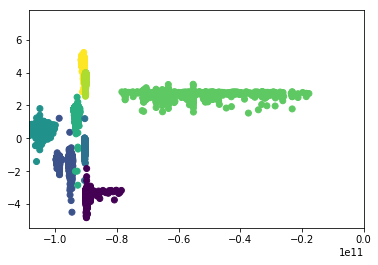

In [13]:
plt.show()

## 其他聚类算法尝试

AffinityPropagation与Birch对memory要求较高，本地40G不够用

In [14]:
from sklearn.cluster import AffinityPropagation

In [15]:
model = AffinityPropagation()

In [16]:
aff_data = data.copy()

In [17]:
y_pred = model.fit_predict(aff_data)

MemoryError: 

## 利用pca降维后再聚类

In [9]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2)

In [16]:
pca_data = data.copy()

In [17]:
calling_num = pca_data.pop('CALLING_NUM')

## 查看降维后的方差分布

In [21]:
pca.fit(pca_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [22]:
pca.explained_variance_ratio_

array([ 0.57914064,  0.42085936])

In [23]:
pca.explained_variance_

array([ 3.20228875,  2.32709134])

In [24]:
pca_data = pca.transform(pca_data)

In [26]:
from sklearn.cluster import KMeans

In [29]:
model = KMeans(n_clusters=40)

In [30]:
y_pred = model.fit_predict(pca_data)

In [31]:
y_pred

array([1, 2, 3, ..., 3, 3, 3], dtype=int32)

In [33]:
cluster_data = data.copy()

In [34]:
cluster_data['label'] = y_pred

In [36]:
cluster_data.to_csv("./data/20180105_40.csv", index=False)